## VIẾT HÀM

#### CÁC HÀM CƠ BẢN CỦA BÀI TOÁN LINEAR REGRESSION

In [13]:
import math

# Hàm nhân ma trận A (ma trận với mỗi dòng là một điểm dữ liệu)
# với ma trận cột b chứa các nhãn tương ứng 
def multMatrix(A, b):
        if A[0].__len__() != b.__len__():
                print("Cannot multiply!")
                return
        result = [0] * A.__len__()
        for i in range(A.__len__()):
                newRow = [0] * b[0].__len__()
                for j in range(b[0].__len__()):
                        for k in range(A[i].__len__()):
                                newRow[j] += A[i][k] * b[k][j]
                result[i] = newRow
        return result

# Hàm nhân ma trận với một hằng số
def multMatrixWithScalar(A, a):
        result = []
        for row in A:
                newRow = [elem * a for elem in row]
                result.append(newRow)
        return result

# Chuyển một vector thành một ma trận một cột
def getMatrix(V):
        A = [[a] for a in V]
        return A

# Chuyển một ma trận một cột thành một vectored
def getVector(M):
        V = []
        for i in range(M.__len__()):
                V.append(M[i][0])
        return V

# Hàm lấy hàm chuyển vị của một ma trận
def transpose(A):
        result = [0] * A[0].__len__()
        for i in range(A[0].__len__()):
                newRow = [0] * A.__len__()
                for j in range(A.__len__()):
                        newRow[j] = A[j][i]
                result[i] = newRow
        return result

# Hàm tính định thức của một ma trận vuông cấp n
def det(A):
        if A.__len__() != A[0].__len__():
                print("Not a square matrix!")
                return
        if A.__len__() == 1:
                return A[0][0]
        if A.__len__() == 2:
                return A[0][0] * A[1][1] - A[1][0] * A[1][0]
        _det = 0
        for i in range(A[0].__len__()):
                matrix = []
                for j in range(1, A.__len__()):
                        newRow = []
                        for k in range(A[0].__len__()):
                                if k != i:
                                        newRow.append(A[j][k])
                        matrix.append(newRow)
                _det += A[0][i] * math.pow(-1, 1 + i + 1) * det(matrix)
        return _det

# Hàm tính phần bù đại số
def complement(A, i, j):
        matrix = []
        for k in range(A.__len__()):
                if k == i:
                        continue
                newRow = []
                for l in range(A[k].__len__()):
                        if l != j:
                                newRow.append(A[k][l])
                matrix.append(newRow)
        return math.pow(-1, i + 1 + j + 1) * det(matrix)

# Hàm lấy ma trận nghịch đảo của một ma trận
def inverse(A):
        _det = det(A)
        if _det == 0:
                print("Matrix is not invertible!")
                return
        C = []
        for i in range(A.__len__()):
                newRow = []
                for j in range(A[i].__len__()):
                        c = complement(A, i, j)
                        newRow.append(c)
                C.append(newRow)
        adj = transpose(C)
        result = multMatrixWithScalar(adj, 1 / _det)
        return result

#### MÔ HÌNH LINEAR REGRESSION

In [14]:
# Hàm tính bộ hệ số bias tốt nhất (w), ma trận A, vector b
def w(A, b):
        A_t = transpose(A)
        B = inverse(multMatrix(A_t, A))
        C = multMatrix(A_t, getMatrix(b))
        w = getVector(multMatrix(B, C))
        return w

# Mô hình linear regression, ma trận X, vector Y
def _LinearRegression(X, Y):
        n = X.__len__()
        c1 = [1] * n
        K = []
        K.append(c1)
        for i in range(X[0].__len__()):
                newRow = []
                for j in range(n):
                        newRow.append(X[j][i])
                K.append(newRow)
        A = transpose(K)
        _w = w(A, Y)
        return _w

X = [147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]
Y = [ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]

_w = _LinearRegression(getMatrix(X), Y)
print(_w)

[-33.73541020580706, 0.5592049619396704]


#### TRỰC QUAN HÓA DỮ LIỆU

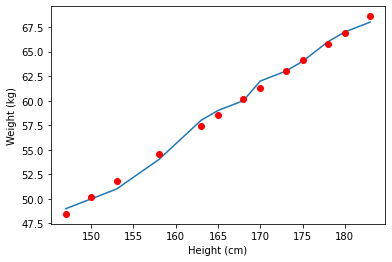

In [25]:
import matplotlib.pyplot as plt

plt.plot(X, Y)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
Y_hat = [_w[0] + a * _w[1] for a in X]
plt.plot(X, Y_hat, 'ro')
plt.show()

## SỬ DỤNG THƯ VIỆN NUMPY

#### MÔ HÌNH LINEAR REGRESSION

In [45]:
import numpy as np

def getA(X):
        one = np.ones((X.shape[0], 1))
        A = np.concatenate((one, X), axis=1)
        return A

def w_1(A, b):
        A_t = np.transpose(A)
        B = np.linalg.inv(np.matmul(A_t, A))
        C = np.matmul(A_t, np.transpose(b))
        _w = np.matmul(B, C)
        return _w

X = np.array([[147], [150], [153], [158], [163], [165], [168], [170], [173], [175], [178], [180], [183]])
Y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]])
A = getA(X)
_w = w_1(A, Y)      
print(_w)
print()
print("Y[0] = ", Y[0][0])
print("Y_hat[0] = ", _w[0][0] + X[0][0] * _w[1][0])

[[-33.73541021]
 [  0.55920496]]

Y[0] =  49
Y_hat[0] =  48.4677191993224


## SỬ DỤNG THƯ VIỆN SCIKIT - LEARN

#### MÔ HÌNH LINEAR REGRESSION

In [47]:
from sklearn import datasets, linear_model

regr = linear_model.LinearRegression(fit_intercept=False)
one = np.ones((X.shape[0], 1))
A = np.concatenate((one, X), axis=1)
b = np.transpose(Y)
regr.fit(A, b)
print(regr.coef_)

[[-33.73541021   0.55920496]]
